<a href="https://colab.research.google.com/github/SergeyShchus/Automatic_GIS/blob/master/Notebook/Geopandas/Static_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
# Install OpticalRS. This also installs GeoPandas because GeoPandas is a dependency of OpticalRS
!apt-get install software-properties-common python-software-properties > /dev/null
!add-apt-repository ppa:ubuntugis/ppa -y > /dev/null
!apt-get update > /dev/null
!apt-get install -y --fix-missing python-gdal gdal-bin libgdal-dev > /dev/null
!pip2 install OpticalRS > /dev/null

! pip install geopandas

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

from google.colab import drive
drive.mount('/content/gdrive')

E: Package 'python-software-properties' has no installation candidate
Extracting templates from packages: 100%
     |████████████████████████████████| 1.0MB 4.2MB/s 
     |████████████████████████████████| 14.8MB 325kB/s 
     |████████████████████████████████| 6.5MB 46.1MB/s 
Mounted at /content/gdrive


In [12]:

!wget 'https://raw.githubusercontent.com/SergeyShchus/Automatic_GIS/master/DATA/L4_data.zip'

--2021-03-09 19:22:33--  https://raw.githubusercontent.com/SergeyShchus/Automatic_GIS/master/DATA/L4_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 687496 (671K) [application/zip]
Saving to: ‘L4_data.zip’

L4_data.zip         100%[===================>] 671.38K  --.-KB/s    in 0.05s   

2021-03-09 19:22:33 (12.6 MB/s) - ‘L4_data.zip’ saved [687496/687496]



In [13]:
!unzip L4_data.zip

Archive:  L4_data.zip
 extracting: Amazon_river.cpg        
  inflating: Amazon_river.dbf        
  inflating: Amazon_river.prj        
  inflating: Amazon_river.shp        
  inflating: Amazon_river.shx        
 extracting: Helsinki_borders.cpg    
  inflating: Helsinki_borders.dbf    
  inflating: Helsinki_borders.prj    
  inflating: Helsinki_borders.shp    
  inflating: Helsinki_borders.shx    
 extracting: TravelTimes_to_5975375_RailwayStation.cpg  
  inflating: TravelTimes_to_5975375_RailwayStation.dbf  
  inflating: TravelTimes_to_5975375_RailwayStation.prj  
  inflating: TravelTimes_to_5975375_RailwayStation.shp  
  inflating: TravelTimes_to_5975375_RailwayStation.shx  


In [15]:

!wget 'https://raw.githubusercontent.com/SergeyShchus/Automatic_GIS/master/DATA/dataE5.zip'

--2021-03-09 19:23:43--  https://raw.githubusercontent.com/SergeyShchus/Automatic_GIS/master/DATA/dataE5.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977534 (955K) [application/zip]
Saving to: ‘dataE5.zip.1’

dataE5.zip.1        100%[===================>] 954.62K  --.-KB/s    in 0.07s   

2021-03-09 19:23:44 (13.0 MB/s) - ‘dataE5.zip.1’ saved [977534/977534]



In [16]:
!unzip dataE5.zip

Archive:  dataE5.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of dataE5.zip or
        dataE5.zip.zip, and cannot find dataE5.zip.ZIP, period.


In [17]:
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt

# Filepaths
grid_fp = "/content/TravelTimes_to_5975375_RailwayStation.shp"
roads_fp = "/content/roads.shp"
metro_fp = "/content/metro.shp"

# Read files
grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

In [18]:
# Check the crs of each layer
print(roads.crs)
print(metro.crs)
print(grid.crs)

epsg:2392
epsg:2392
epsg:3067


In [20]:
# Check CRS names
print("Roads crs:", CRS(roads.crs).name)
print("Metro crs:", CRS(metro.crs).name)
print("Grid crs: ",CRS(grid.crs).name)

Roads crs: KKJ / Finland zone 2
Metro crs: KKJ / Finland zone 2
Grid crs:  ETRS89 / TM35FIN(E,N)


In [21]:
# Reproject geometries to ETRS89 / TM35FIN based on the grid crs:
roads = roads.to_crs(crs=grid.crs)
metro = metro.to_crs(crs=grid.crs)

In [22]:
roads.crs == metro.crs == grid.crs

True

In [26]:
!pip install mapclassify

In [27]:
import mapclassify

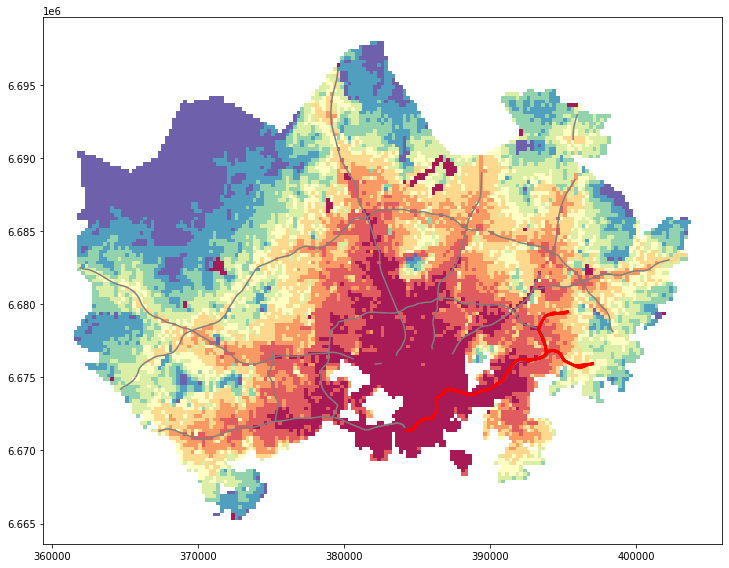

In [28]:
# Create one subplot. Control figure size in here.
fig, ax = plt.subplots(figsize=(12,8))

# Visualize the travel times into 9 classes using "Quantiles" classification scheme
grid.plot(ax=ax, column="car_r_t", linewidth=0.03, cmap="Spectral", scheme="quantiles", k=9, alpha=0.9)

# Add roads on top of the grid
# (use ax parameter to define the map on top of which the second items are plotted)
roads.plot(ax=ax, color="grey", linewidth=1.5)

# Add metro on top of the previous map
metro.plot(ax=ax, color="red", linewidth=2.5)

# Remove the empty white-space around the axes
plt.tight_layout()

# Save the figure as png file with resolution of 300 dpi
outfp = "static_map.png"
plt.savefig(outfp, dpi=300)

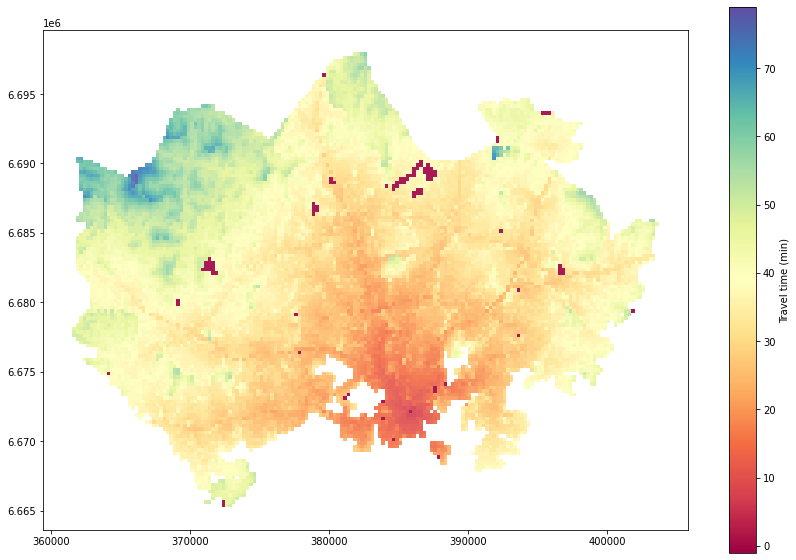

In [30]:
# Create one subplot. Control figure size in here.
fig, ax = plt.subplots(figsize=(12,8))

# Visualize the travel times into 9 classes using "Quantiles" classification scheme
grid.plot(ax=ax, column="car_r_t", 
          linewidth=0.03, 
          cmap="Spectral", 
          alpha=0.9, 
          legend=True, 
          legend_kwds={'label': "Travel time (min)"}
         )

#ax.get_legend().set_bbox_to_anchor(8)
#ax.get_legend().set_title("Legend title")

# Remove the empty white-space around the axes
plt.tight_layout()

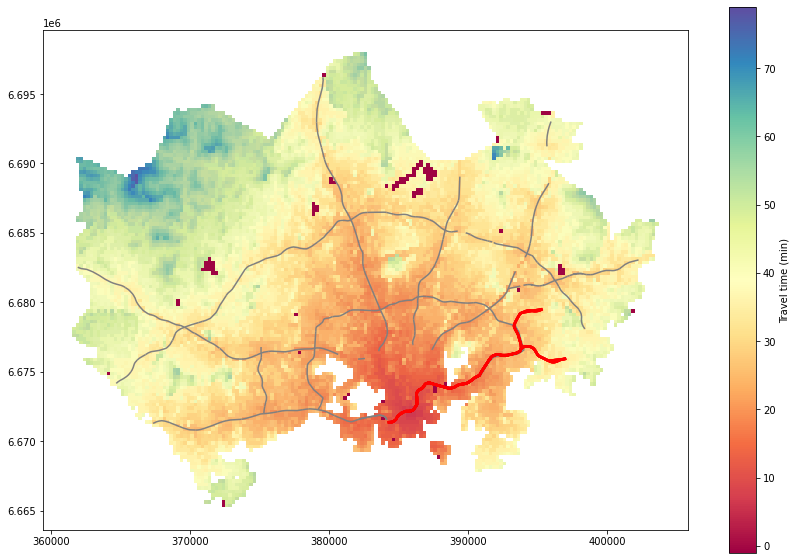

In [31]:
# Create one subplot. Control figure size in here.
fig, ax = plt.subplots(figsize=(12,8))

# Visualize the travel times into 9 classes using "Quantiles" classification scheme
grid.plot(ax=ax, column="car_r_t", linewidth=0.03, cmap="Spectral", scheme="quantiles", k=9, alpha=0.9)

# Add roads on top of the grid
# (use ax parameter to define the map on top of which the second items are plotted)
roads.plot(ax=ax, color="grey", linewidth=1.5)

# Add metro on top of the previous map
metro.plot(ax=ax, color="red", linewidth=2.5)

# Visualize the travel times into 9 classes using "Quantiles" classification scheme
grid.plot(ax=ax, column="car_r_t", 
          linewidth=0.03, 
          cmap="Spectral", 
          alpha=0.9, 
          legend=True, 
          legend_kwds={'label': "Travel time (min)"}
         )

#ax.get_legend().set_bbox_to_anchor(8)
#ax.get_legend().set_title("Legend title")

# Remove the empty white-space around the axes
plt.tight_layout()

# Save the figure as png file with resolution of 300 dpi
outfp = "static_map.png"
plt.savefig(outfp, dpi=300)

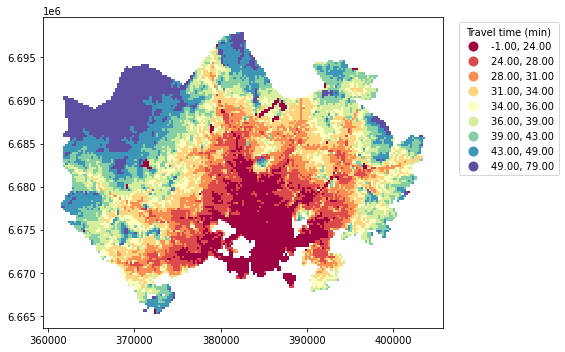

In [32]:
# Create one subplot. Control figure size in here.
fig, ax = plt.subplots(figsize=(10,5))

# Visualize the travel times into 9 classes using "Quantiles" classification scheme
grid.plot(ax=ax, 
          column="car_r_t", 
          linewidth=0.03, 
          cmap="Spectral", 
          scheme="quantiles", 
          k=9, 
          legend=True, 
          )

# Re-position the legend and set a title
ax.get_legend().set_bbox_to_anchor((1.3,1))
ax.get_legend().set_title("Travel time (min)")

# Remove the empty white-space around the axes
plt.tight_layout()

In [35]:
!pip install contextily

import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
%matplotlib inline

# Filepaths
grid_fp = "/content/TravelTimes_to_5975375_RailwayStation.shp"

# Read data
grid = gpd.read_file(grid_fp)
grid.head(3)

     |████████████████████████████████| 19.1MB 1.6MB/s 


,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,30133,50,31872,56,5785642,32940,121,146,32940,113,133,5975375,29626,423,"POLYGON ((382500.000 6697750.000, 382250.000 6..."


In [36]:
print(grid.crs)

epsg:3067


In [37]:
# Reproject to EPSG 3857
data = grid.to_crs(epsg=3857)
print(data.crs)

epsg:3857


In [38]:
data.head(2)

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((2767221.646 8489079.101, 2766716.966..."
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((2767726.329 8489095.521, 2767221.646..."


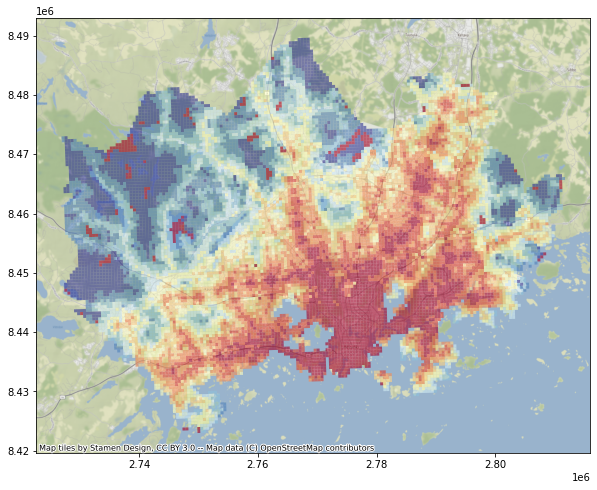

In [39]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

# Plot the data
data.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme="quantiles", k=9, alpha=0.6)

# Add basemap 
ctx.add_basemap(ax)

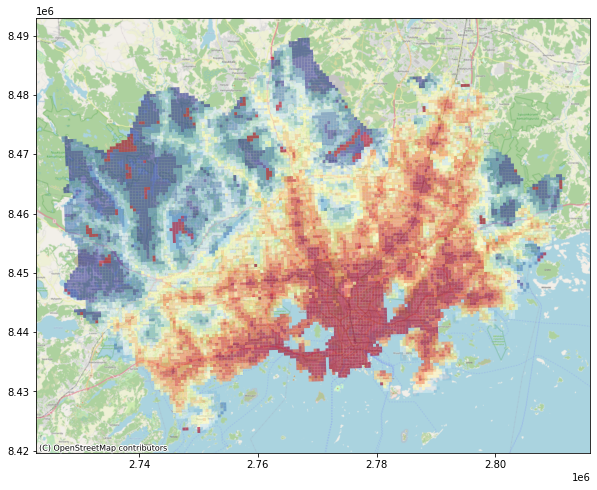

In [40]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

# Plot the data
data.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme="quantiles", k=9, alpha=0.6)

# Add basemap with basic OpenStreetMap visualization
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

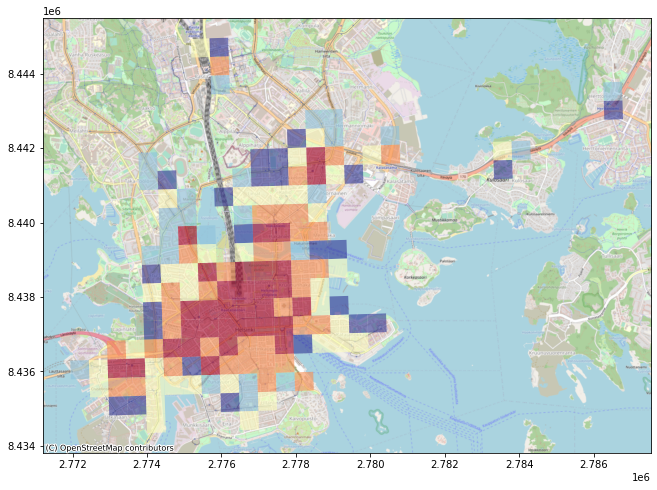

In [41]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

# Subset the data to seel only grid squares near the destination
subset = data.loc[(data['pt_r_t']>=0) & (data['pt_r_t']<=15)]

# Plot the data from subset
subset.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme="quantiles", k=5, alpha=0.6)

# Add basemap with `OSM_A` style
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

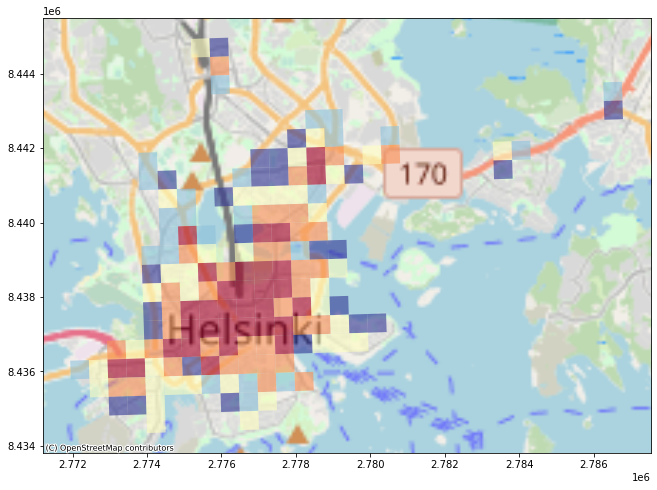

In [42]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

# Plot the data from subset
subset.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme="quantiles", k=5, alpha=0.6)

# Add basemap with `OSM_A` style using zoom level of 11
ctx.add_basemap(ax, zoom=11, source=ctx.providers.OpenStreetMap.Mapnik)

In [43]:
credits = "Travel time data by Digital Geography Lab, Map Data © OpenStreetMap contributors"

(8430000.0, 8470000.0)

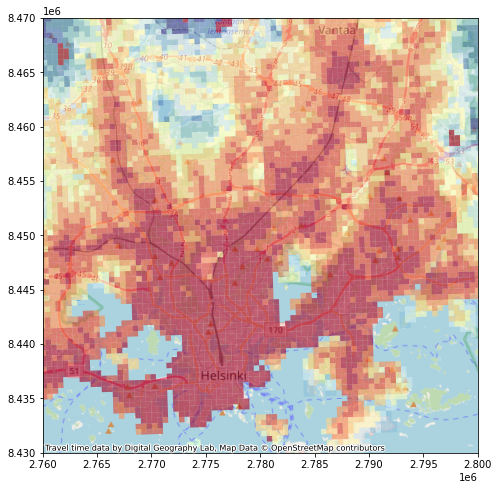

In [44]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

# Plot the data
data.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme="quantiles", k=9, alpha=0.6)

# Add basemap with `OSM_A` style using zoom level of 11 
# Modify the attribution 
ctx.add_basemap(ax, zoom=11, attribution=credits, source=ctx.providers.OpenStreetMap.Mapnik)

# Crop the figure
ax.set_xlim(2760000, 2800000)
ax.set_ylim(8430000, 8470000)

(8435000.0, 8442500.0)

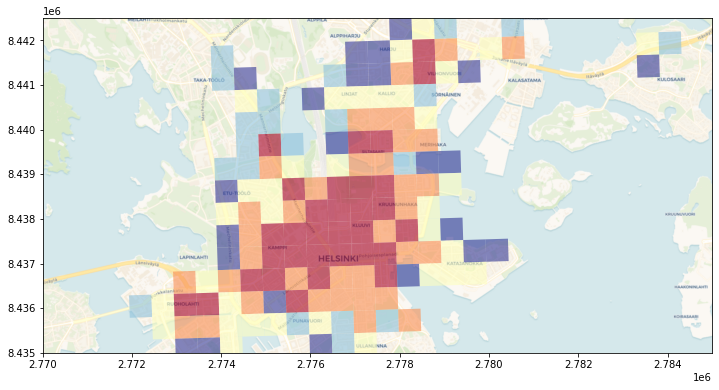

In [45]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

# The formatting should follow: 'https://{s}.basemaps.cartocdn.com/{style}/{z}/{x}/{y}{scale}.png'
# Specify the style to use
style = "rastertiles/voyager"
cartodb_url = 'https://a.basemaps.cartocdn.com/%s/{z}/{x}/{y}.png' % style

# Plot the data from subset
subset.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme="quantiles", k=5, alpha=0.6)
    
# Add basemap with `OSM_A` style using zoom level of 14 
ctx.add_basemap(ax, zoom=14, attribution="", source=cartodb_url)

# Crop the figure
ax.set_xlim(2770000, 2785000)
ax.set_ylim(8435000, 8442500)

(8435000.0, 8442500.0)

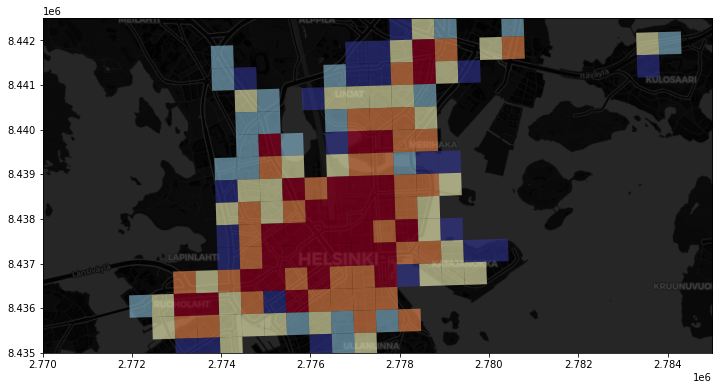

In [46]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

# The formatting should follow: 'https://{s}.basemaps.cartocdn.com/{style}/{z}/{x}/{y}{r}.png'
# Specify the style to use
style = "dark_all"
cartodb_url = 'https://a.basemaps.cartocdn.com/%s/{z}/{x}/{y}.png' % style

# Plot the data from subset
subset.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme="quantiles", k=5, alpha=0.6)

# Add basemap with `OSM_A` style using zoom level of 14 
ctx.add_basemap(ax, zoom=13, attribution="", source=cartodb_url)

# Crop the figure
ax.set_xlim(2770000, 2785000)
ax.set_ylim(8435000, 8442500)